In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
col_names = ['pregnant', 'glucose', 'bp','skin','insulin','bmi','pedigree','age','label']

In [ ]:
data = pd.read_csv('diabetes.csv',header = None,names=col_names)
print(data.shape)
data.head()

(769, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [ ]:
data.isnull().sum()

,0
pregnant,0
glucose,0
bp,0
skin,0
insulin,0
bmi,0
pedigree,0
age,0
label,0


In [ ]:
feature_cols = ['pregnant', 'glucose', 'bp','skin','insulin','bmi','pedigree','age']
x = data[feature_cols]
y = data.label

In [ ]:

data = data[data['pregnant'].apply(lambda x: str(x).isdigit())]

for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data = data.dropna()

X = data.drop('label', axis=1)
y = data['label']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', random_state=5)
model.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=5)

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', random_state=5)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Predictions:", y_pred)

Predictions: [1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1
 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 1 1 0 1]


In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
accuracy_score = metrics.accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_mat)
print("Accuracy Score:", accuracy_score)
print("Accuracy in Percentage:", round(accuracy_score * 100, 2), "%")


Confusion Matrix:
 [[74 26]
 [26 28]]
Accuracy Score: 0.6623376623376623
Accuracy in Percentage: 66.23 %


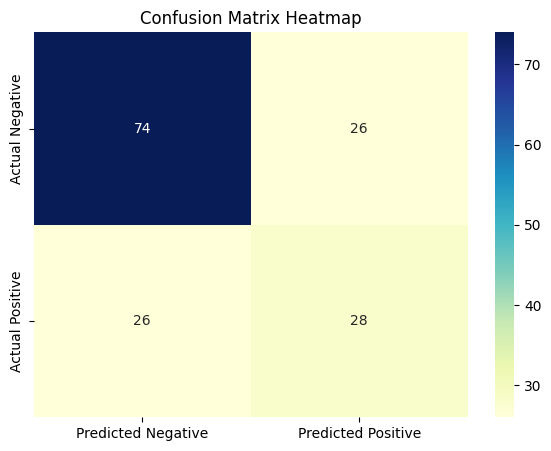

In [ ]:
conf_mat_df = pd.DataFrame(conf_mat, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

plt.figure(figsize=(7,5))
sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix Heatmap')
plt.show()